FUNCTION TRANSFORMER 

In [2]:
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

filling those missing values

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_23188\970858164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


Survived    0
Age         0
Fare        0
dtype: int64

step 2:train test split

In [9]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_23188\2813244501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


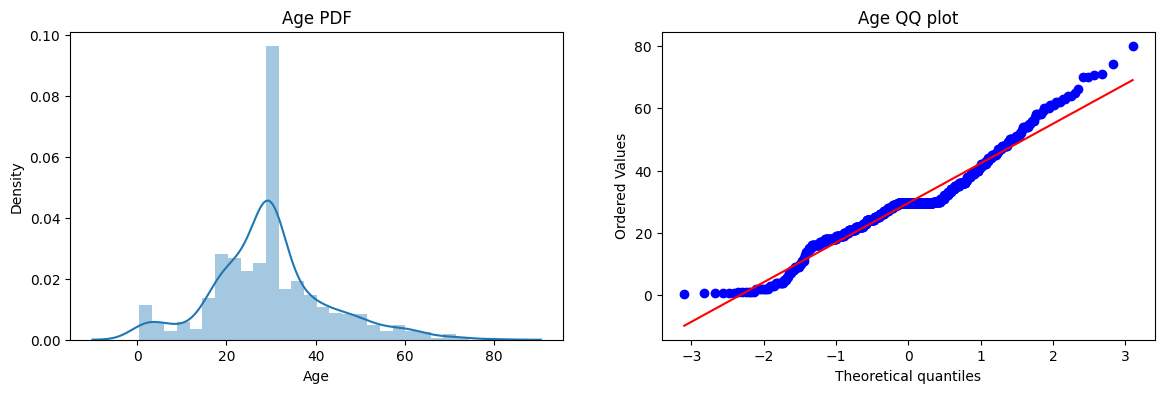

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(x_train['Age'])
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show() 

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_23188\189497691.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

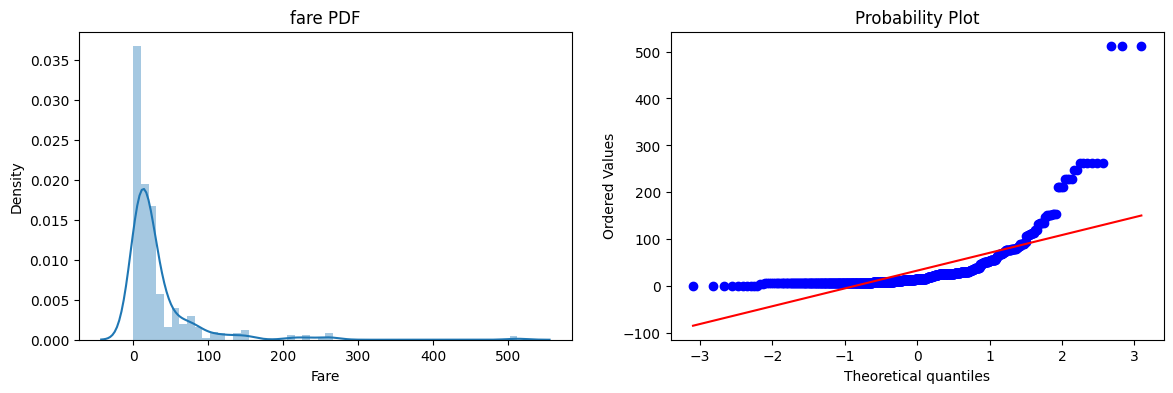

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(x_train['Fare'])
plt.title('fare PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)

In [17]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [16]:
trf=FunctionTransformer(func=np.log1p)

In [18]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [19]:
clf1.fit(x_train_transformed,y_train)
clf2.fit(x_test_transformed,y_test)

y_pred1=clf1.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)

applying function transform usinf column transform 

In [ ]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')